## Grid Search
Fit the model using SVM and apply Grid search technique to find best model and best parameters for a dataset given in the url  


In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
import pickle

In [2]:
# Importing the dataset

dataset = pd.read_csv('Dataset/Social_Network_Ads.csv')

In [3]:
# information of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
# description of dataset 

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
# check for null

dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# check for duplicates

dataset.duplicated().sum()

0

In [7]:
# check for min

dataset.min()

User ID            15566689
Gender               Female
Age                      18
EstimatedSalary       15000
Purchased                 0
dtype: object

In [8]:
# check for datatype

dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# # split dataset in features and lable

# x = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, 4].values

In [11]:
# Splitting the dataset into the Training set and Test set

train,test = train_test_split(dataset, test_size = 0.25, random_state = 0)

test.to_csv("test.csv", encoding='utf-8', index=False)

# train,cv = train_test_split(train, test_size = 0.25, random_state = 0)

In [12]:
# split dataset in features and lable

x_train = train.iloc[:, [2, 3]].values
y_train = train.iloc[:, 4].values

# x_cv = cv.iloc[:, [2, 3]].values
# y_cv = cv.iloc[:, 4].values

In [13]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
# x_cv = sc.transform(x_cv)

/home/admin1/anaconda3/envs/newenvt/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Fitting Kernel SVM to the Training set

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier = classifier.fit(x_train, y_train) 

In [15]:
# Predicting the Test set results

y_pred = classifier.predict(x_train)

In [16]:
# Making the Confusion Matrix

cm = confusion_matrix(y_train, y_pred)
print("confusion_matrix\n",cm)

confusion_matrix
 [[171  18]
 [  8 103]]


In [17]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.06388957356626285

In [18]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [20]:
# check for recall,precision,f1-score

print("Classification report",classification_report(y_train,y_pred))

Classification report              precision    recall  f1-score   support

          0       0.96      0.90      0.93       189
          1       0.85      0.93      0.89       111

avg / total       0.92      0.91      0.91       300



In [21]:
file = open("model.pickle",'wb')
pickle.dump(classifier,file)
file.close()

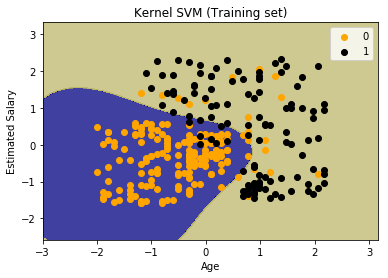

In [22]:
# Visualising the Training set results

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navy', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'black'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()